<h1><center> PPOLS564: Foundations of Data Science </center><h1>
<h3><center> Lecture 15 <br><br><font color='grey'> A Geometric Interpretation of Ordinary Least Squares Regression </font></center></h3>

In [124]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import pandas as pd

## Generating Fake Data 

Let's generate some fake data where we know the true coefficient values. 

In [42]:
np.random.seed(123)         # set seed to repoduce results
N = 100                     # set sample size
x = np.random.normal(0,1,N) # simulate a random variable
e = np.random.normal(0,1,N) # simulate error
y = 1 +  3*x + e            # generate some y that is a function of x and random error

In [43]:
# Combine X in into a design matrix with a columns of ones (for the constant)
X  = np.vstack([np.ones(N),x]).T
X[1:5,:]

array([[ 1.        ,  0.99734545],
       [ 1.        ,  0.2829785 ],
       [ 1.        , -1.50629471],
       [ 1.        , -0.57860025]])

Plot the data to get a feel for what is going on.

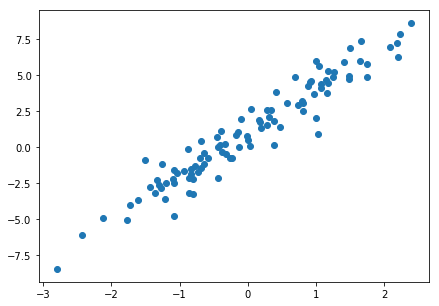

In [44]:
plt.figure(figsize=(7,5))
plt.scatter(X[:,1],y)
plt.show()

# Geometric Interpretation of OLS

The following discussion will tie together what we've learned up to this point about linear algebra and apply it one of the most commonly used statistical model in our tool kit. 

## Column Space of a Matrix of Explanatory Variables

Say we had a some variables in matrix $\textbf{X}$ that we wanted to use to predict some outcome $\textbf{y}$. 

$\textbf{X}_{n\times p}$ is a matrix with dimensions $n$ (the number of observations) and $p$ (the number of variables).

First, as we've learned, if the column space of $\textbf{X}$ --- $C(\textbf{X})$ --- is of full rank (meaning each column vector is linearly independent) then we can think of $C(\textbf{X})$ as spanning the space in $\Re^p$ (which we'll represent for the sake of convenience as a two dimensional plane in $\Re^2$)

![](figures/col-space-fig.png)

## Outcome as a Vector 

As we've seen in previous lectures, our outcome variable can be represented as a column vector $\vec{\textbf{y}}$ with some magnitude and direction.

The dimensions of this column vector are $\textbf{y}_{n\times 1}$, where $n$ corresponds with the number of observations. 

##  Using a linear combination of $\textbf{X}_{n\times p}$ to approximate $\textbf{y}_{n\times 1}$

Our goal is to find a linear combination of the vectors in matrix $\textbf{X}_{n\times p}$ that yields $\textbf{y}_{n\times 1}$.

However, there might not be enough information in $\textbf{X}_{n\times p}$ to do this. 

Put differently, $\textbf{y}_{n\times 1}$ could be thought of as shooting off the plane of $\textbf{X}_{n\times p}$. 

![](figures/outcome-vec-fig.png)

Given that we can't find a linear combination of $\textbf{X}_{n\times p}$ to get to   $\textbf{y}_{n\times 1}$. We can approximate the relationship by taking the **projection** of $\textbf{y}_{n\times 1}$ ( $\hat{\textbf{y}}$) on $C(\textbf{X}_{n\times p})$.

This projection is going to be some **linear combination** of the column vectors of $\textbf{X}$. Recall that we can get anywhere in the span of $\textbf{X}$ by arbitrarily scaling and adding the linearly independent vectors.

$$ c_1\vec{x}_1 +  c_2\vec{x}_2 + \dots + c_p\vec{x}_p $$

We want to find the constants that generate the projection of $\hat{\textbf{y}}$. We'll call this vector $\beta$.

## Finding $\beta$

Recall that to find the projection of $\textbf{y}_{n\times 1}$ onto $C(\textbf{X}_{n\times p})$, we need to shoot an **orthogonal vector** from our plane to the vector $\textbf{y}_{n\times 1}$. 

![](figures/full-fig.png)

We'll call this vector $\epsilon$. Well, it's the distance between our vectors $\textbf{y}$ and $\hat{\textbf{y}}$

\begin{equation}
\epsilon_{n \times 1} = \textbf{y}_{n \times 1} - \hat{\textbf{y}}_{n \times 1}
\end{equation}

Which we can re-express as


\begin{equation}
\epsilon_{n \times 1} = \textbf{y} - \textbf{X}\beta
\end{equation}

Recall that two vectors are **perpendicular (orthogonal) to one another when their dot products equal 0**. Do you recall why?

We want $\epsilon$ epsilon to be orthogonal to the span of $\textbf{X}_{n\times p}$. Note that we must transpose $\textbf{X}_{n\times p}$ to multiply it by $\epsilon_{n\times 1}$


\begin{equation}
\textbf{X}_{p \times n}^T \cdot \epsilon_{n \times 1} = 0
\end{equation}

Now, let's rearrange so that we can isolate our vector $\beta$.

\begin{equation}
\textbf{X}_{p \times n}^T  \cdot ( \textbf{y}_{n \times 1} - \textbf{X}_{n \times p} \beta_{p \times 1} ) = 0
\end{equation}

\begin{equation}
\textbf{X}_{p \times n}^T \textbf{y}_{n \times 1} - \textbf{X}_{p \times n}^T \textbf{X}_{n \times p} \beta_{p \times 1} = 0
\end{equation}


\begin{equation}
\textbf{X}_{p \times n}^T \textbf{y}_{n \times 1} = \textbf{X}_{p \times n}^T \textbf{X}_{n \times p} \beta_{p \times 1}
\end{equation}


\begin{equation}
(\textbf{X}_{p \times n}^T \textbf{X}_{n \times p})^{-1} \textbf{X}_{p \times n}^T \textbf{y}_{n \times 1} = \beta_{p \times 1}
\end{equation}


This provides a formula to find our constants for the linear combination of $\textbf{X}$ that generates our projection $\hat{\textbf{y}}$

$$ \beta = (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \textbf{y}$$

In [46]:
B = la.inv(X.T.dot(X)).dot(X.T.dot(y))
B

array([0.98091425, 2.98340745])

## Generating $\hat{\textbf{y}}$

As we've seen earlier, we can now generate a projection of $\textbf{y}$ by dotting the vector $\beta$ by $\textbf{X}$.

$$ \hat{\textbf{y}}_{n \times p} = \textbf{X}_{n \times p} \cdot \beta_{p \times 1}$$

In [48]:
y_hat = X.dot(B)

Let's plot this 

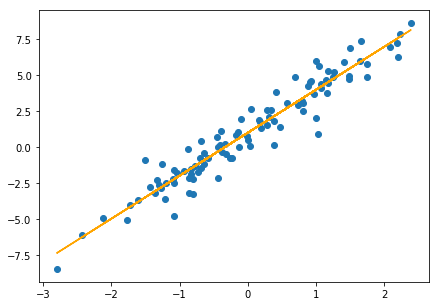

In [49]:
plt.figure(figsize=(7,5))
plt.scatter(X[:,1],y)
plt.plot(X[:,1],y_hat,color="orange")
plt.show()

## What is $\epsilon$? 

It's our error! We can think of it as the distance between our approximation of $\textbf{y}$ and the actual observed $\textbf{y}$. Can you see why $\epsilon$ minimizes the squared distance? 

Recall that we can get a vectors squared length by dotting the vector by itself.

$$ \epsilon_{1 \times n}^T \cdot \epsilon_{n \times 1} = ||\epsilon||^2$$

When $\epsilon$ is orthogonal to $\textbf{X}$ we're minimizing the length of $\epsilon$. Any other (non-orthogonal) vector would have a greater length than our current vector $\epsilon$.

![](figures/alt-epsilon-fig.png)

In [ ]:
e = y - y_hat

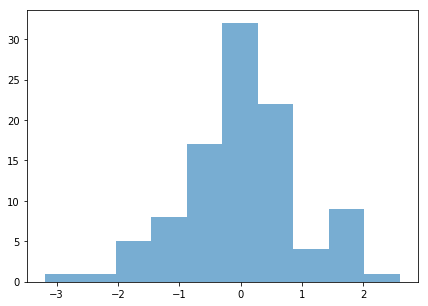

In [174]:
plt.figure(figsize=(7,5))
plt.hist(e,alpha=.6)
plt.show()

## Assessing Fit: R-Squared

Recall a projection is really a scaled version of the vector being projected. This provides an intuitive way to think of model fit. 

We'll first need to center $\textbf{y}^* = \textbf{y}-\bar{y} $ and $\hat{\textbf{y}}^* = \hat{\textbf{y}} - \bar{\hat{{y}}}$.


We can take the length of the projection and divided it by the length of the observed vector. 

$$ \frac{||\hat{\textbf{y}}^*||^2}{||\textbf{y}^* ||^2}$$


If the lengths are the same, then this ratio will equal 1. That is, if $\textbf{y}$ lands on the plane created by $C(\textbf{X})$, then our projection and $\textbf{y}$ are equivalent (i.e. $\textbf{y}$ is a linear dependent on $C(\textbf{X})$). If the length don't project onto one another at all then this ratio will equal 0 (meaning that all $C(\textbf{X})$ is completely orthogonal to our outcome vector $\textbf{y}$).

This ratio is our **R-Squared**, which we use to assess model fit.

In [64]:
y_hat_center = y_hat - y_hat.mean()
y_center = y - y.mean()

# R Squared
r_squared = y_hat_center.dot(y_hat_center)/y_center.dot(y_center)
r_squared

0.9233409734326694

In fact, we can think of the length of $||\textbf{y}^*||^2$ as being scaled by the angle (i.e. the cosine/correlation) between $\textbf{y}^*$ and our projection $\hat{\textbf{y}}^*$

$$ ||\hat{\textbf{y}}^*||^2 = ||\textbf{y}^*\cos{\theta} ||^2 $$

$$ ||\hat{\textbf{y}}^*||^2 = ||\textbf{y}^*corr(\textbf{y}^*,\hat{\textbf{y}}^*)||^2 $$

In [60]:
def cosine(a,b):
    '''Our function calculating cosine between two vectors
    '''
    cos = np.dot(a,b)/(np.sqrt(np.dot(a,a)) * np.sqrt(np.dot(b,b))  )
    return cos


# The correlation between our observed value and our prediction
cos = cosine(y_hat_center,y_center)
cos

0.9609063291667237

In [62]:
u = y_center*cos
u.dot(u)/y_center.dot(y_center)

0.9233409734326679

Finally, an alternative specification using the error instead.

In [63]:
1 - (e.dot(e)/y_center.dot(y_center))

0.9233409734326684

## Calculating Uncertainty

Calculating the uncertainty in our estimates of $\beta$ relies on the Gauss-Markov assumptions and some manipulations of the resulting equations. (We won't not cover these in class, but see [here](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf) for more details on how these estimates are derived and why they are unbiased given the assumptions). That said, let's think through how to calculate the uncertainty. 

Recall that our orthogonal vector $\textbf{e}$ is the error in the model. 

We can calculate our estimate of uncertainty by taking the length of $\textbf{e}$ and dividing it by our sample size $N$ adjusted for our degrees of freedom (i.e. the number of parameters we had $p$). 

$$\hat{\sigma}^2 = \frac{||e||^2}{n-p}   = \frac{e^T\cdot e}{n-p}  $$

This will provide use with a scalar that we'll then apply to our matrix of explanatory variables to calculate the **standard error** of our coefficients $\beta$.

$$ cov(\beta) = \hat{\sigma}^2 (\textbf{X}^T \textbf{X})^{-1} $$

$$ D = diag(cov(\beta)) $$

$$ se(\beta) = \sqrt{D} $$


In [66]:
# Let's calculate the uncertainty
n = X.shape[0]
p = X.shape[1]
sigma2 = e.T.dot(e)/(n-p)
sigma2

0.9598505223222047

In [107]:
cov_B = sigma2*la.inv(X.T.dot(X))
cov_B

array([[ 0.00960405, -0.00020442],
       [-0.00020442,  0.0075405 ]])

In [108]:
D = cov_B.diagonal()
D

array([0.00960405, 0.0075405 ])

In [109]:
se = np.sqrt(D)
se

array([0.09800024, 0.08683606])

### How did we do?

Let's compare our calculations those yielded by the statsmodels package.

In [110]:
# Use 

print(f'''
Our Manually Generated Values:

    Intercept: {B[0].round(4)} ({se[0].round(3)})
            x: {B[1].round(4)} ({se[1].round(3)})

    R-Squared: {r_squared.round(3)}
''')


Our Manually Generated Values:

    Intercept: 0.9809 (0.098)
            x: 2.9834 (0.087)

    R-Squared: 0.923



In [111]:
model = smf.ols('y ~ x', data=pd.DataFrame(dict(y=y,x=X[:,1]))).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     1180.
Date:                Sun, 04 Nov 2018   Prob (F-statistic):           1.84e-56
Time:                        18:28:37   Log-Likelihood:                -138.83
No. Observations:                 100   AIC:                             281.7
Df Residuals:                      98   BIC:                             286.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9809      0.098     10.009      0.000       0.786       1.175
x              2.9834      0.087     34.357      0.000       2.811       3.156
==============================================================================
Omnibus:                        5.027   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                5.131
Skew:                          -0.308   Prob(JB):                       0.0769
Kurtosis:                       3.924   Cond. No.                         1.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# OLS as transformation matrices

We've seen that we can generate a projection of $\textbf{y}$ onto $C(\textbf{X})$ using the following formula.

$$\hat{\textbf{y}} = \textbf{X}\beta$$

Where 

$$ \beta = (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \textbf{y}$$

So we can re-write this as 

$$\hat{\textbf{y}} = \textbf{X}(\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \textbf{y}$$

$$\hat{\textbf{y}} = \textbf{H} \textbf{y}$$

$\textbf{H}$ is known as the "Hat Matrix". $\textbf{H}$ transforms the vector $\textbf{y}$ into $\hat{\textbf{y}}$.

In [99]:
H = X.dot(la.inv(X.T.dot(X)).dot(X.T))
y_hat2 = H.dot(y)

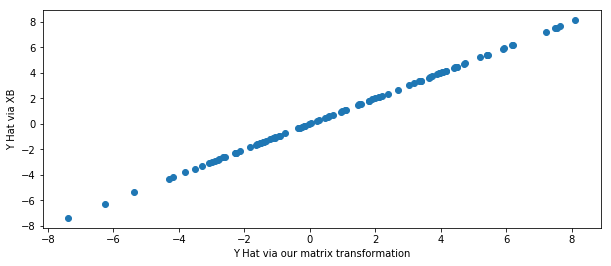

In [121]:
plt.figure(figsize=(10,4))
plt.scatter(y_hat,y_hat2)
plt.xlabel('Y Hat via our matrix transformation')
plt.ylabel('Y Hat via XB')
plt.show()

Likewise, consider the formula for our orthogonal vector $e$, our error. 

$$\textbf{e} = \textbf{y} - \textbf{X}\beta$$

$$\textbf{e} = \textbf{y} - \textbf{X}(\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \textbf{y}$$

We can factor out $\textbf{y}$

$$\textbf{e} = (\textbf{I} - \textbf{X}(\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T) \textbf{y}$$

$$\textbf{e} = \textbf{M}\textbf{y}$$

$\textbf{M}$ transforms the vector $\textbf{y}$ into $\textbf{e}$.


Thus, we can decompose $\textbf{y}$ to the following expression.

$$ \textbf{y} =  \textbf{H} \textbf{y} + \textbf{M}\textbf{y} $$

```
                              outcome = prediction + error
```

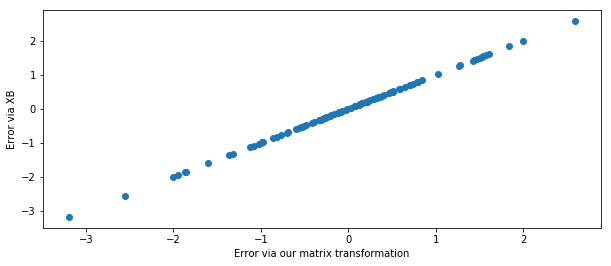

In [120]:
M = np.eye(N) - X.dot(la.inv(X.T.dot(X)).dot(X.T))
e2 = M.dot(y)
plt.figure(figsize=(10,4))
plt.scatter(e,e2)
plt.xlabel('Error via our matrix transformation')
plt.ylabel('Error via XB')
plt.show()

$\textbf{H}$ and  $\textbf{M}$ have some interesting properties.


1. They're orthogonal to one another. 

$$ \textbf{H}\textbf{M} = 0 $$

2. They're idempotent

$$ \textbf{H}\textbf{H} = \textbf{H} $$

$$ \textbf{M}\textbf{M} = \textbf{M} $$

3. When combined, they yield an identity matrix.

$$ \textbf{H} + \textbf{M} = \textbf{I} $$

Again, the point is to reinforce that when performing some operation on a vector, we can express that operation (function) as a matrix. 

# Applied Example

Let's take what we've just learned and apply it to a real world dataset. The following is our **Chicago Crime Data** that we curated in the last assignment.

**_Question_**: Does violent crimes lead to a higher arrest rate?

In [127]:
dat = pd.read_csv('crime-disctrict-month.csv')
dat.head()

,district,month,N_crimes,N_violent_crimes,N_nonviolent_crimes,crime_rate,arrest_rate
0,19,8,1177,218.0,959,average,0.12
1,16,6,727,189.0,538,average,0.11
2,4,7,1266,435.0,831,average,0.19
3,24,8,771,174.0,597,average,0.13
4,17,8,635,159.0,476,low,0.10


In [162]:
# Generate new proportion variable
dat['prop_viol'] = dat['N_violent_crimes']/dat['N_crimes']

In [163]:
D = dat[['arrest_rate','prop_viol','N_crimes']]
D.corr()

,arrest_rate,prop_viol,N_crimes
arrest_rate,1.000000,0.388906,0.599844
prop_viol,0.388906,1.000000,-0.113937
N_crimes,0.599844,-0.113937,1.000000


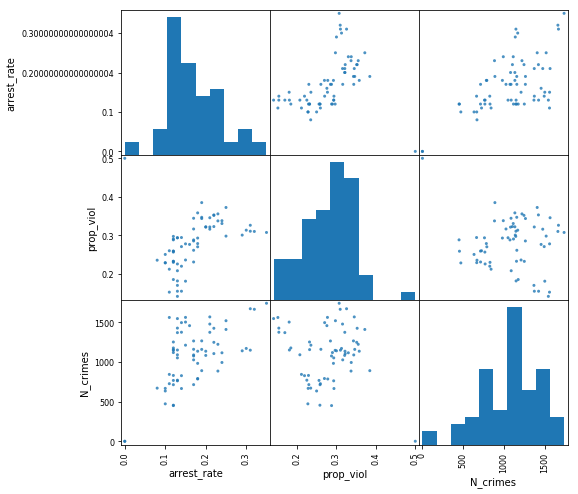

In [168]:
axes = pd.plotting.scatter_matrix(D, alpha=0.8,figsize=(8,8))

Let's use the above discussion to estimate this relationship using what we've just learned!